# Bike Sharing Assignment

## Problem Statement

### A US bike-sharing provider aspires to understand the demand for shared bikes among the people. They want to understand the factors affecting the demand for these shared bikes in the American market. 
### The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### *There are no missing values

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Cleaning the Data

### Removing instant column as we dont need their index

In [6]:
df.drop("instant", axis=1, inplace=True)

### Removing the columns "casual" and "registered" as they are not predictors, they were created by segregating the target in two categories.

In [7]:
df.drop(["casual","registered"], axis=1, inplace=True)

### Converting date column "dteday" to just day column, as we already have columns for month and year

In [8]:
df["day"] = pd.DatetimeIndex(df.dteday).day
df.drop("dteday", axis=1, inplace=True)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1


## Visualising Numeric Variables

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
num_cols = ["temp","atemp","hum","windspeed","cnt"]

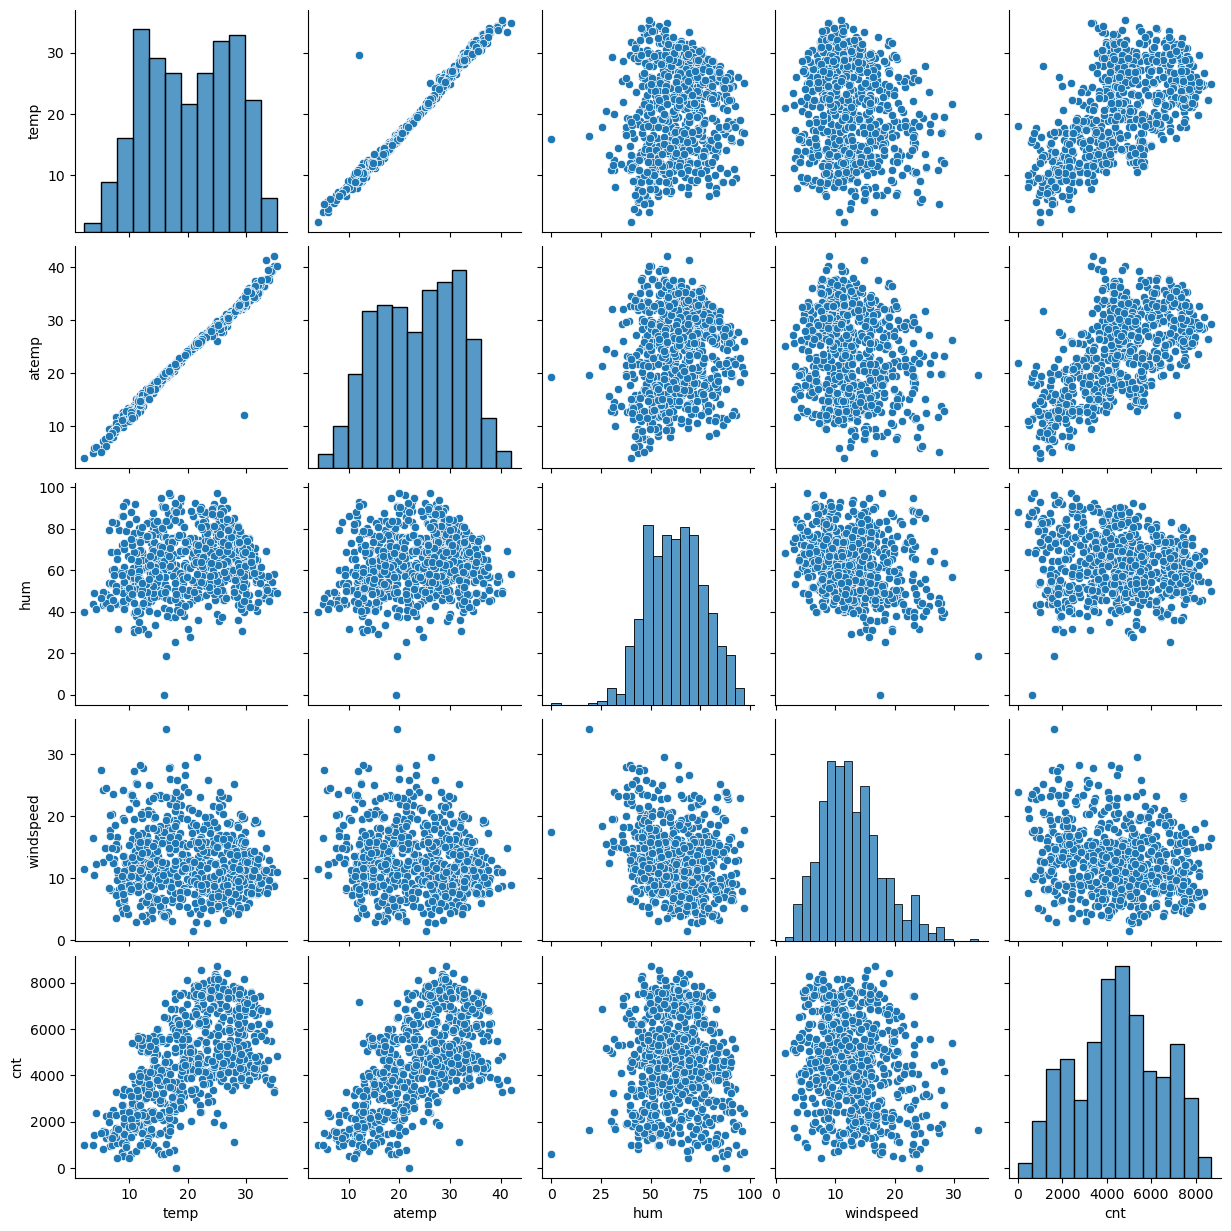

In [12]:
sns.pairplot(df[num_cols])
plt.show()

### *temp and atemp shows some relation with our target variable cnt
### *temp and atemp have very strong multicollinearity

#### Following columns has more than 2 distinct values and they are numbered 1,2,3.. We would need to create dummy variables for them so that we have a seperate column for each of their values for analysis. However, since these numbers 1,2,3... comming in column names would not mean anything and we would not be able to tell later what these columns are for, so we first need to convert these column values into categorical string values. We will leave only the 'day' column as is.
- 'season', 'mnth', 'weekday', 'weathersit'

In [13]:
def binary_map1(x):
    return x.map({1: "spring", 2: "summer", 3: "fall", 4: "winter" })
df.season = df[["season"]].apply(binary_map1) 

In [14]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
def binary_map2(x):
    return x.map({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
df.mnth = df[["mnth"]].apply(binary_map2) 

In [16]:
df.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [17]:
# observing the fist few rows of the dataset indicates that weekday numbers from 0 to 6 indicate Tuesday to Monday
def binary_map3(x):
    return x.map({0: "Tue", 1: "Wed", 2: "Thu", 3: "Fri", 4: "Sat", 5: "Sun", 6: "Mon"})
df.weekday = df[["weekday"]].apply(binary_map3) 

In [18]:
df.weekday.value_counts()

Mon    105
Tue    105
Wed    105
Thu    104
Sat    104
Sun    104
Fri    103
Name: weekday, dtype: int64

In [19]:
def binary_map4(x):
    return x.map({1: "Clear", 2: "Mist", 3: "LightSnow", 4: "HeavyRain"})
df.weathersit = df[["weathersit"]].apply(binary_map4) 

In [20]:
df.weathersit.value_counts()

Clear        463
Mist         246
LightSnow     21
Name: weathersit, dtype: int64

## Visualising Categorical Variables

In [21]:
cat_cols = df.columns[~df.columns.isin(num_cols)]

In [22]:
plt.rcParams['figure.figsize'] = [15, 20]

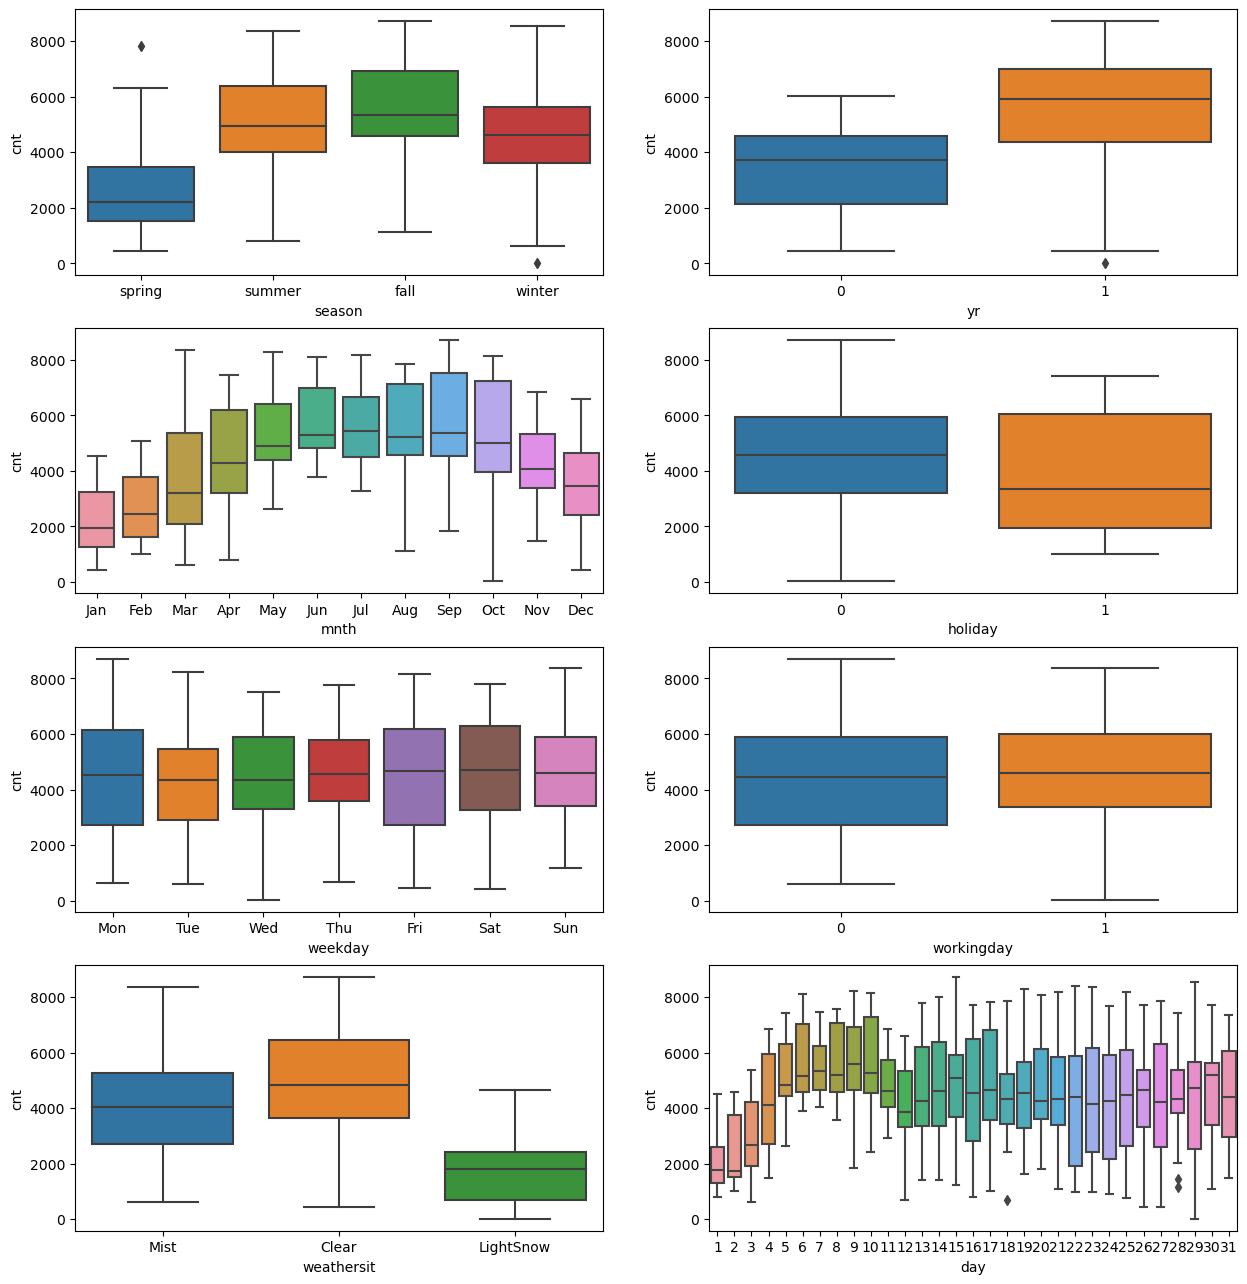

In [23]:
c = 1
for col in cat_cols:
    plt.subplot(5,2,c)
    sns.boxplot(data=df, x=col, y="cnt")
    c+=1
plt.show()

### *Following seems to be strong predictors
- season
- mnth
- weathersit
- yr

## Data Preparation

### Creating Dummy Variables

In [24]:
seasons = pd.get_dummies(df.season, drop_first=True)
df = pd.concat([df, seasons], axis=1)
df.drop(["season"], axis=1, inplace=True)

In [25]:
mnths = pd.get_dummies(df.mnth, drop_first=True)
df = pd.concat([df, mnths], axis=1)
df.drop(["mnth"], axis=1, inplace=True)

In [26]:
weekdays = pd.get_dummies(df.weekday, drop_first=True)
df = pd.concat([df, weekdays], axis=1)
df.drop(["weekday"], axis=1, inplace=True)

In [27]:
weathersits = pd.get_dummies(df.weathersit, drop_first=True)
df = pd.concat([df, weathersits], axis=1)
df.drop(["weathersit"], axis=1, inplace=True)

In [28]:
days = pd.get_dummies(df.day, drop_first=True)
df = pd.concat([df, days], axis=1)
df.drop(["day"], axis=1, inplace=True)

In [29]:
# Converting all column names to string
df.columns = df.columns.astype("str")
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'LightSnow', 'Mist', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'],
      dtype='object')

### Splitting the Data into Training and Testing Sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=40)

### Rescaling the Features (Min-Max Scaling)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [33]:
# Scalling all numerical variables, as all others are already 0 or 1
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [34]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,22,23,24,25,26,27,28,29,30,31
466,1,0,1,0.428749,0.404993,0.480464,0.552573,0.619765,0,1,...,0,0,0,0,0,0,0,0,0,0
96,0,0,1,0.479433,0.465495,0.621297,0.288453,0.358836,0,1,...,0,0,0,0,0,0,0,0,0,0
432,1,0,1,0.445643,0.417436,0.419493,0.808970,0.523125,1,0,...,0,0,0,0,0,0,0,0,0,0
687,1,0,1,0.407630,0.389264,0.642335,0.438441,0.630120,0,0,...,0,0,0,0,0,0,0,0,0,0
507,1,0,1,0.712791,0.663593,0.798196,0.164117,0.602623,0,1,...,0,1,0,0,0,0,0,0,0,0


In [35]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,22,23,24,25,26,27,28,29,30,31
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.027451,0.692157,0.555774,0.522172,0.648639,0.343074,0.516616,0.239216,0.256863,...,0.035294,0.031373,0.033333,0.035294,0.033333,0.033333,0.033333,0.033333,0.029412,0.019608
std,0.500491,0.163554,0.462054,0.232408,0.213975,0.146821,0.161914,0.229771,0.427024,0.437332,...,0.184703,0.174494,0.179682,0.184703,0.179682,0.179682,0.179682,0.179682,0.169124,0.138785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.351931,0.339940,0.543474,0.227244,0.349143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.570242,0.549619,0.650494,0.313459,0.524103,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755819,0.698178,0.752576,0.435596,0.695295,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking Correlation between "cnt" and all features

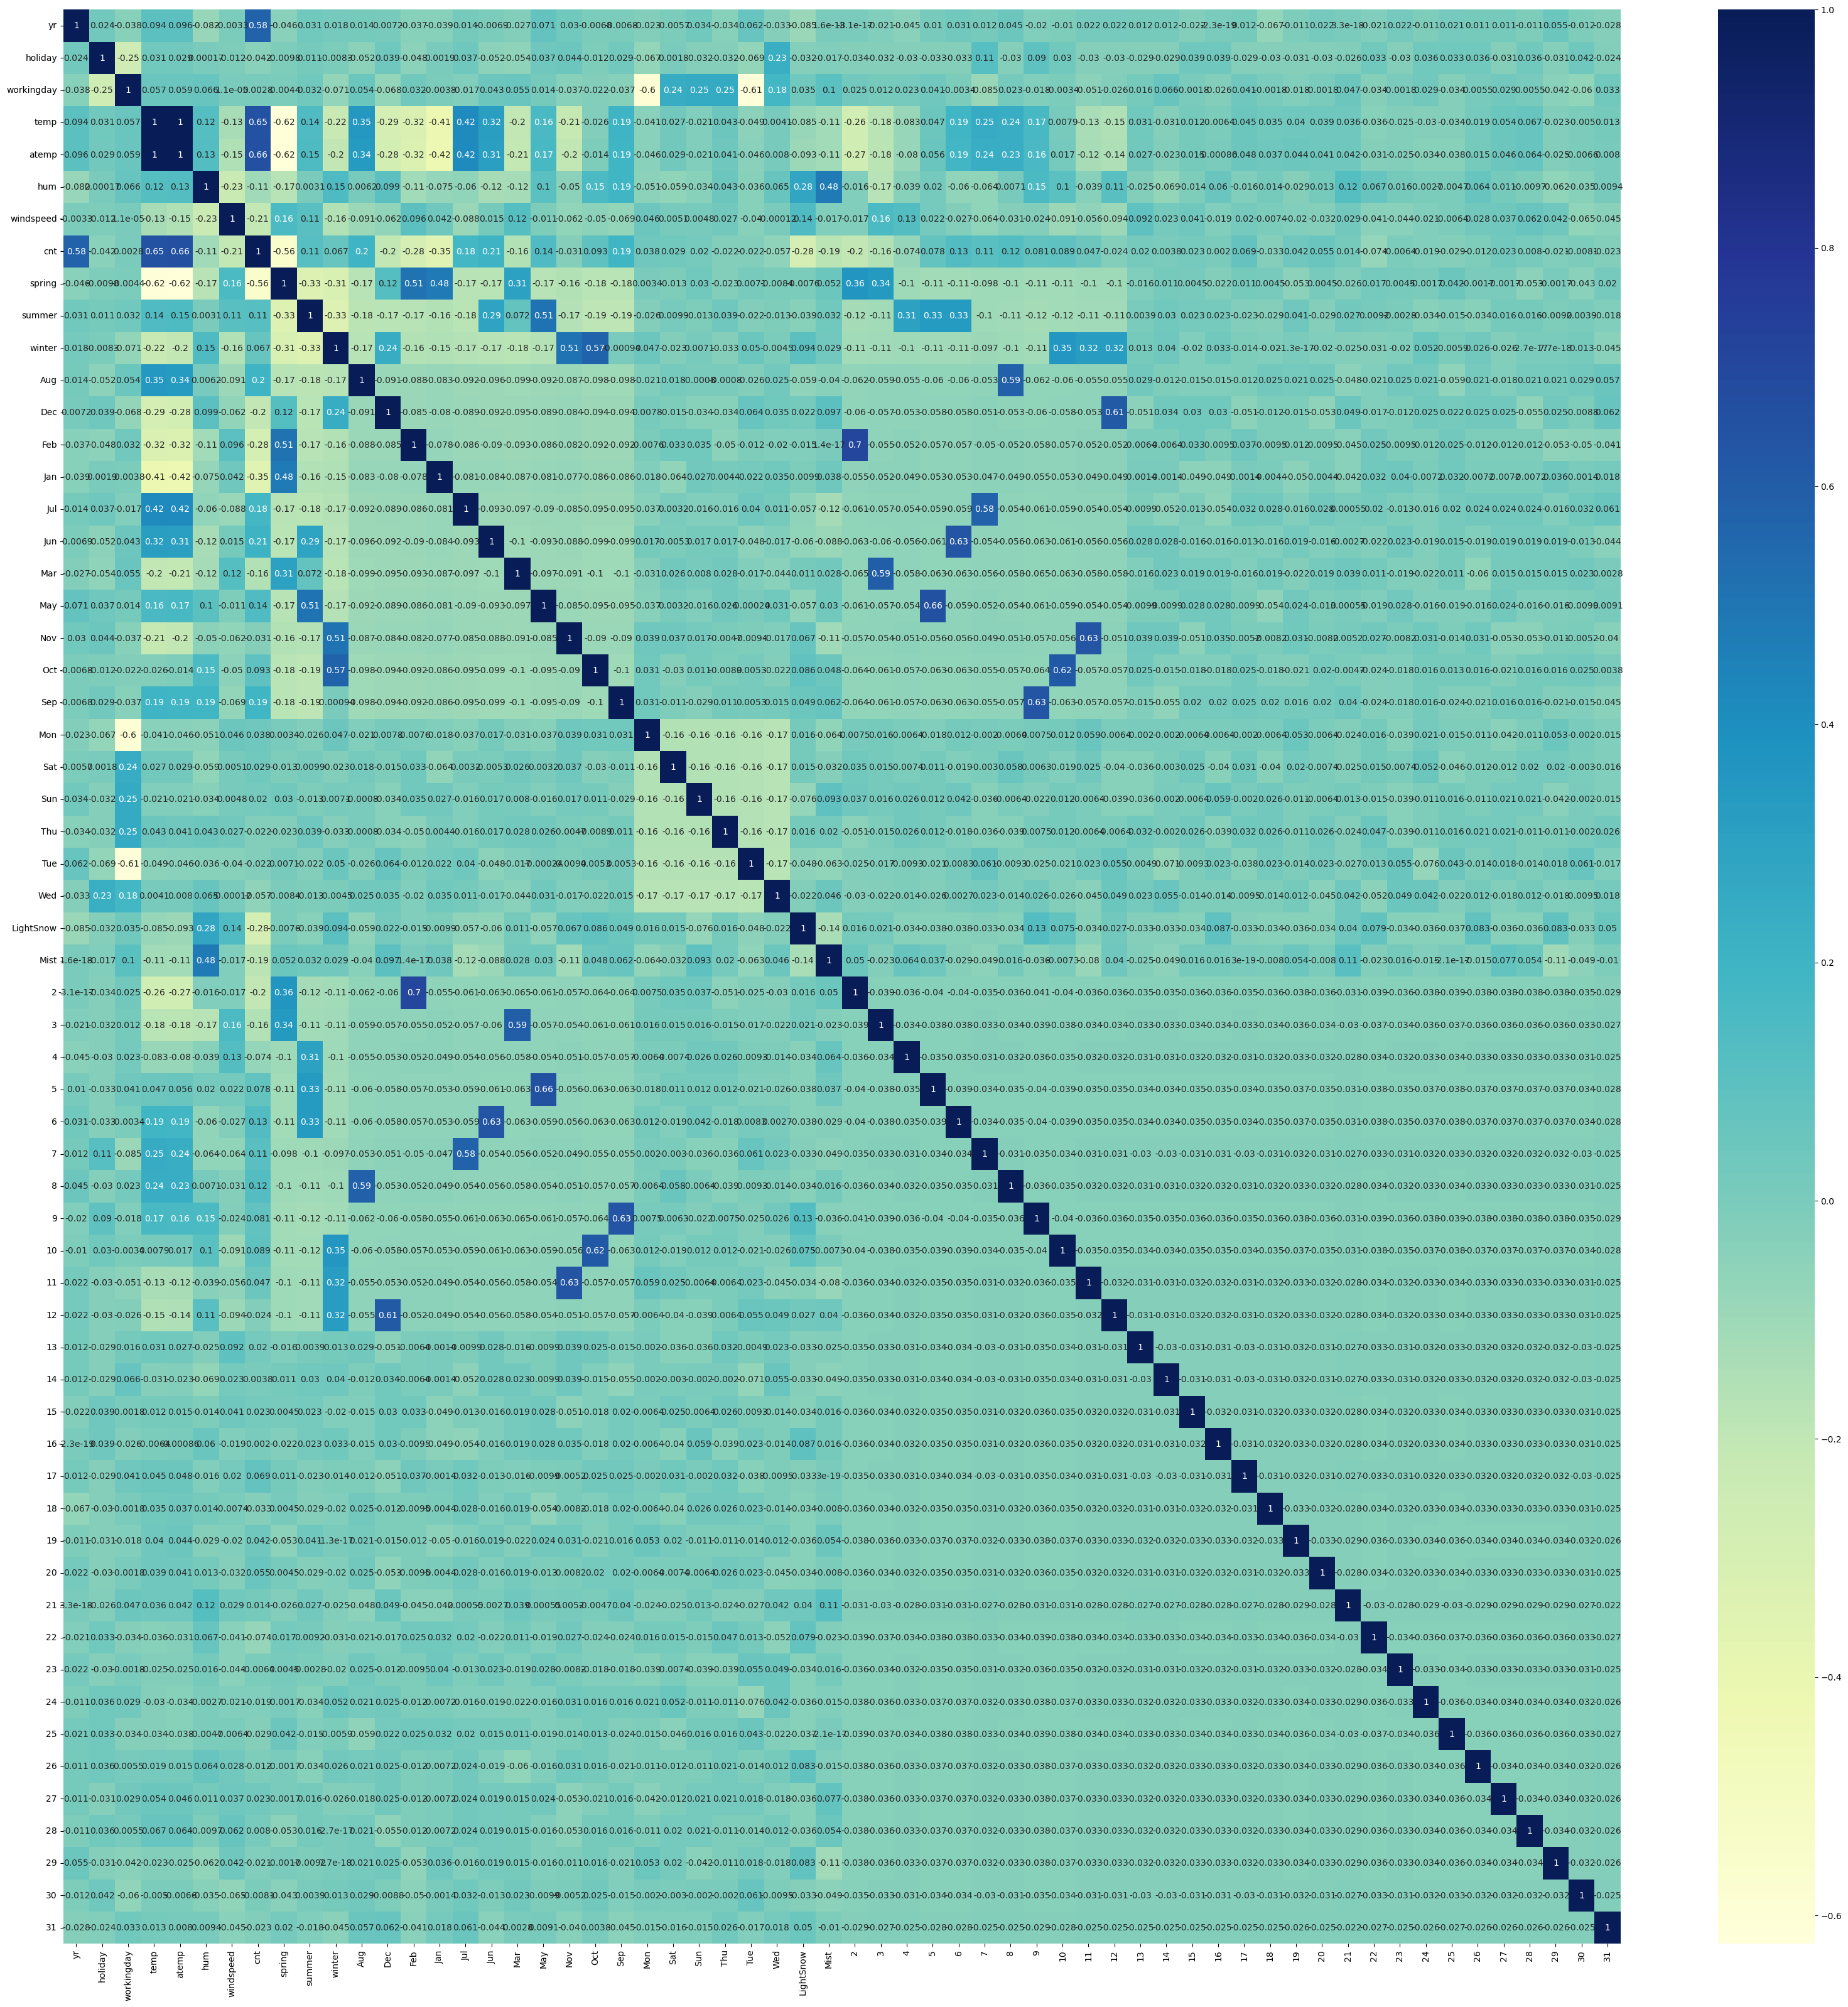

In [36]:
plt.rcParams['figure.figsize'] = [40, 40]
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### "cnt" has highest correlation with "atemp". So, we pick atemp as the first feature to try to fit a regression line

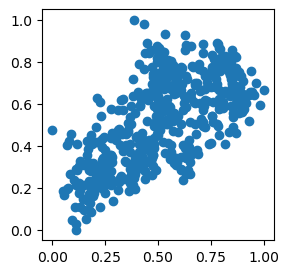

In [37]:
plt.rcParams['figure.figsize'] = [3, 3]
plt.scatter(df_train.cnt, df_train.atemp)
plt.show()

### Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop("cnt")
x_train = df_train

### Building model using statsmodel

In [39]:
import statsmodels.api as sm
# adding a column for constant
x_train_new = sm.add_constant(x_train.atemp)

In [40]:
# creating the first model
lr = sm.OLS(y_train, x_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     388.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.21e-64
Time:                        09:07:19   Log-Likelihood:                 171.70
No. Observations:                 510   AIC:                            -339.4
Df Residuals:                     508   BIC:                            -330.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1475      0.020      7.290      0.000       0.108       0.187
atemp          0.7068      0.036     19.708      0.000       0.636       0.777
==============================================================================
Omnibus:                       12.205   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.374
Skew:                           0.184   Prob(JB):                       0.0152
Kurtosis:                       2.492   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R<sup>2</sup> is 0.433 which is good for one feature. Lets see if we can improve that by adding another feature 

In [41]:
# adding the second highest correlated feature,"temp"
x_train_new = sm.add_constant(x_train[["atemp","temp"]])

In [42]:
# creating the second model
lr = sm.OLS(y_train, x_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     198.6
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.05e-64
Time:                        09:07:19   Log-Likelihood:                 174.40
No. Observations:                 510   AIC:                            -342.8
Df Residuals:                     507   BIC:                            -330.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1387      0.021      6.762      0.000       0.098       0.179
atemp          1.7170      0.437      3.933      0.000       0.859       2.575
temp          -0.9332      0.402     -2.321      0.021      -1.723      -0.143
==============================================================================
Omnibus:                        5.340   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.041
Skew:                           0.094   Prob(JB):                        0.133
Kurtosis:                       2.607   Cond. No.                         98.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### *R<sup>2</sup> has improved slightly, but from the Data dictionary we understand that temp and atemp are very simmilar. The multicollinearity between them should be high. We can check this with VIF

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
x_train_new.drop(["const"], axis=1, inplace=True)
vif["Features"]=x_train_new.columns
vif["VIF"]=[variance_inflation_factor(x_train_new, i) for i in range(len(x_train_new.columns))]
vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,atemp,971.130175
1,temp,971.130175


#### *VIF is hugh, we can't have both temp and atemp

In [44]:
# adding the next highest correlated feature,"yr" instead of "temp"
x_train_new = sm.add_constant(x_train[["atemp","yr"]])

In [45]:
# creating the third model
lr = sm.OLS(y_train, x_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     588.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          7.90e-133
Time:                        09:07:19   Log-Likelihood:                 332.86
No. Observations:                 510   AIC:                            -659.7
Df Residuals:                     507   BIC:                            -647.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0567      0.015      3.687      0.000       0.026       0.087
atemp          0.6532      0.026     24.840      0.000       0.602       0.705
yr             0.2377      0.011     21.139      0.000       0.216       0.260
==============================================================================
Omnibus:                       35.370   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.675
Skew:                          -0.547   Prob(JB):                     2.69e-11
Kurtosis:                       4.045   Cond. No.                         6.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# checking VIF
vif=pd.DataFrame()
x_train_new.drop(["const"], axis=1, inplace=True)
vif["Features"]=x_train_new.columns
vif["VIF"]=[variance_inflation_factor(x_train_new, i) for i in range(len(x_train_new.columns))]
vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,atemp,1.861276
1,yr,1.861276


#### *R<sup>2</sup> has improved to 0.699, all p-values are zero, and VIF for both features is below 2. This mean model would be able to explain almost 70% of target variable with just two predictors and correlation is low between them, which is good.

In [47]:
# lets try and add the next highest correlated feature,"spring"
x_train_new = sm.add_constant(x_train[["atemp","yr", "spring"]])

In [48]:
# creating the fouth model
lr = sm.OLS(y_train, x_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     475.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          8.99e-147
Time:                        09:07:19   Log-Likelihood:                 368.59
No. Observations:                 510   AIC:                            -729.2
Df Residuals:                     506   BIC:                            -712.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1776      0.020      8.901      0.000       0.138       0.217
atemp          0.4827      0.031     15.384      0.000       0.421       0.544
yr             0.2393      0.010     22.806      0.000       0.219       0.260
spring        -0.1367      0.016     -8.723      0.000      -0.167      -0.106
==============================================================================
Omnibus:                       92.798   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.138
Skew:                          -0.948   Prob(JB):                     3.17e-47
Kurtosis:                       5.545   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif=pd.DataFrame()
x_train_new.drop(["const"], axis=1, inplace=True)
vif["Features"]=x_train_new.columns
vif["VIF"]=[variance_inflation_factor(x_train_new, i) for i in range(len(x_train_new.columns))]
vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,atemp,1.864865
1,yr,1.947943
2,spring,1.114248


#### *R<sup>2</sup> has improved to 0.738, all p-values are still zero, and VIFs are close to 2. This mean model would be able to explain almost 73.8% of target variable and correlation is low between them.

## Feature Selection (with RFE)

#### Let build another model by selecting features using FRE

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with output of 8 number of variable
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=8)
rfe = rfe.fit(x_train, y_train)

In [52]:
# viewing rankings of features
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 31),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 32),
 ('winter', False, 3),
 ('Aug', False, 46),
 ('Dec', False, 13),
 ('Feb', False, 19),
 ('Jan', False, 18),
 ('Jul', False, 8),
 ('Jun', False, 39),
 ('Mar', False, 45),
 ('May', False, 47),
 ('Nov', False, 2),
 ('Oct', False, 27),
 ('Sep', False, 7),
 ('Mon', False, 4),
 ('Sat', False, 51),
 ('Sun', False, 48),
 ('Thu', False, 36),
 ('Tue', False, 6),
 ('Wed', False, 37),
 ('LightSnow', True, 1),
 ('Mist', False, 9),
 ('2', False, 20),
 ('3', False, 28),
 ('4', False, 44),
 ('5', False, 10),
 ('6', False, 29),
 ('7', False, 23),
 ('8', False, 52),
 ('9', False, 40),
 ('10', False, 17),
 ('11', True, 1),
 ('12', False, 16),
 ('13', False, 30),
 ('14', False, 34),
 ('15', False, 14),
 ('16', False, 15),
 ('17', False, 12),
 ('18', False, 43),
 ('19', False, 22),
 ('20', False, 21),
 ('21', 

In [53]:
features_selected = x_train.columns[rfe.support_]
features_selected

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'LightSnow',
       '11'],
      dtype='object')

### Building model using statsmodel

In [54]:
# Creating x_train with RFE selected features
x_train_rfe = x_train[features_selected]
# Adding a constant variable
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [55]:
# Running the linear model
lr_rfe = sm.OLS(y_train, x_train_rfe).fit()
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     266.5
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          4.50e-175
Time:                        09:07:20   Log-Likelihood:                 449.97
No. Observations:                 510   AIC:                            -881.9
Df Residuals:                     501   BIC:                            -843.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4200      0.032     13.271      0.000       0.358       0.482
yr             0.2290      0.009     25.316      0.000       0.211       0.247
holiday       -0.1053      0.027     -3.839      0.000      -0.159      -0.051
temp           0.4284      0.026     16.762      0.000       0.378       0.479
hum           -0.2346      0.034     -6.964      0.000      -0.301      -0.168
windspeed     -0.1789      0.029     -6.087      0.000      -0.237      -0.121
spring        -0.1465      0.014    -10.564      0.000      -0.174      -0.119
LightSnow     -0.1809      0.026     -6.917      0.000      -0.232      -0.130
11             0.0595      0.027      2.222      0.027       0.007       0.112
==============================================================================
Omnibus:                       37.892   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.047
Skew:                          -0.486   Prob(JB):                     2.76e-15
Kurtosis:                       4.486   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# checking VIF
vif=pd.DataFrame()
x_train_rfe.drop(["const"], axis=1, inplace=True)
vif["Features"]=x_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(x_train_rfe, i) for i in range(len(x_train_rfe.columns))]
vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,yr,1.996488
1,holiday,1.031245
2,temp,8.967002
3,hum,10.220135
4,windspeed,4.651371
5,spring,1.865310
6,LightSnow,1.162390
7,11,1.072027


#### *VIF for "hum" is well above 5, we should drop it.

In [57]:
features_selected=features_selected.drop(["hum"])

#### Rebuilding the model

In [58]:
x_train_rfe = sm.add_constant(x_train[features_selected])
lr_rfe = sm.OLS(y_train, x_train_rfe).fit()
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     271.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          2.77e-166
Time:                        09:07:20   Log-Likelihood:                 426.41
No. Observations:                 510   AIC:                            -836.8
Df Residuals:                     502   BIC:                            -802.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2504      0.021     11.845      0.000       0.209       0.292
yr             0.2335      0.009     24.728      0.000       0.215       0.252
holiday       -0.1063      0.029     -3.706      0.000      -0.163      -0.050
temp           0.4216      0.027     15.777      0.000       0.369       0.474
windspeed     -0.1243      0.030     -4.193      0.000      -0.182      -0.066
spring        -0.1376      0.014     -9.527      0.000      -0.166      -0.109
LightSnow     -0.2396      0.026     -9.246      0.000      -0.290      -0.189
11             0.0685      0.028      2.448      0.015       0.014       0.123
==============================================================================
Omnibus:                       37.600   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.625
Skew:                          -0.515   Prob(JB):                     6.85e-14
Kurtosis:                       4.339   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif=pd.DataFrame()
x_train_rfe.drop(["const"], axis=1, inplace=True)
vif["Features"]=x_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(x_train_rfe, i) for i in range(len(x_train_rfe.columns))]
vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,yr,1.985181
1,holiday,1.030711
2,temp,3.894121
3,windspeed,4.437405
4,spring,1.533878
5,LightSnow,1.071930
6,11,1.035255


#### *R<sup>2</sup> is good, all p-values are under 0.05, and all VIFs are under 5. This is an acceptable model. However, lets see if there is any significant difference in R<sup>2</sup> if we drop another predictor. 
#### Lets drop the highest p-value predictor "11". Also, this is the day of the month, which is unlikely to predict the target on population data, specially since all other days seems to be insignificant.

In [60]:
features_selected=features_selected.drop(["11"])

In [61]:
x_train_rfe = sm.add_constant(x_train[features_selected])
lr_rfe = sm.OLS(y_train, x_train_rfe).fit()
lr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     313.1
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          2.93e-166
Time:                        09:07:20   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -832.8
Df Residuals:                     503   BIC:                            -803.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2646      0.020     12.959      0.000       0.224       0.305
yr             0.2343      0.009     24.711      0.000       0.216       0.253
holiday       -0.1082      0.029     -3.756      0.000      -0.165      -0.052
temp           0.4049      0.026     15.594      0.000       0.354       0.456
windspeed     -0.1274      0.030     -4.283      0.000      -0.186      -0.069
spring        -0.1458      0.014    -10.327      0.000      -0.174      -0.118
LightSnow     -0.2432      0.026     -9.355      0.000      -0.294      -0.192
==============================================================================
Omnibus:                       41.470   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.541
Skew:                          -0.566   Prob(JB):                     5.86e-15
Kurtosis:                       4.343   Cond. No.                         9.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif=pd.DataFrame()
x_train_rfe_  = x_train_rfe.drop(["const"], axis=1)
vif["Features"]=x_train_rfe_.columns
vif["VIF"]=[variance_inflation_factor(x_train_rfe_ , i) for i in range(len(x_train_rfe_.columns))]
vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,yr,1.971352
1,holiday,1.030243
2,temp,3.882615
3,windspeed,4.388566
4,spring,1.520131
5,LightSnow,1.070782


- R<sup>2</sup> and Adjusted R<sup>2</sup> is almost the same after dropping predictor "11".
- All p-values are zero.
- All VIFs are below 5. This means collinearity between all predictors is low enough for us to build our model.

### *This model seems to be better than our previous model created by manually selecting features (since R<sup>2</sup> is higher). 

## Residual Analysis of the training data

In [63]:
# checking if error terms are normally distributed.
y_train_pred = lr_rfe.predict(x_train_rfe)
errorterms = y_train-y_train_pred

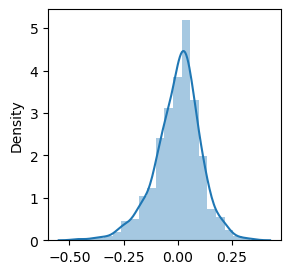

In [64]:
plt.rcParams['figure.figsize'] = [3, 3]
sns.distplot(errorterms, bins=20)
plt.show()

### Error terms are normally distributed around zero

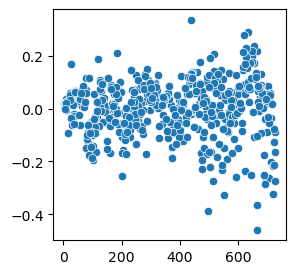

In [65]:
sns.scatterplot(errorterms)
plt.show()

### Since there are no clear pattern, we can say that Error terms are independent of each other. 

### The variance at higher values of x is slightly more than at low values, but the difference is not too much. We can say its Homoscedastic.

### We can say that in our model these assumptions of a linear regressions are holding true.

## Making Predictions Using the Final Model

In [66]:
# scalling the test sets
df_test[num_cols] = scaler.transform(df_test[num_cols])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,22,23,24,25,26,27,28,29,30,31
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.502283,0.031963,0.662100,0.546994,0.512178,0.641856,0.353336,0.515944,0.264840,0.242009,...,0.027397,0.031963,0.031963,0.027397,0.031963,0.031963,0.031963,0.022831,0.031963,0.018265
std,0.501140,0.176306,0.474078,0.231930,0.214731,0.146752,0.154190,0.205920,0.442259,0.429281,...,0.163612,0.176306,0.176306,0.163612,0.176306,0.176306,0.176306,0.149707,0.176306,0.134214
min,0.000000,0.000000,0.000000,0.061289,0.029650,0.261915,0.041051,0.047055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.351139,0.337888,0.520479,0.245522,0.385642,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.518501,0.496998,0.640189,0.347416,0.503797,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.754499,0.692184,0.750751,0.430791,0.660953,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.016896,0.952767,1.002146,0.864144,0.959503,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# splitting the test set
y_test = df_test.pop('cnt')
x_test = df_test

In [68]:
y_test_pred = lr_rfe.predict(sm.add_constant(x_test[features_selected]))

## Model Evaluation

### Using the coefficents we got from the model summary, we can make the equation of the best fitted line as 
- <i><b>cnt = 0.405(temp) - 0.243(LightSnow) + 0.234(yr) - 0.145(spring) - 0.127(windspeed) - 0.108(holiday) + 0.265</b></i>

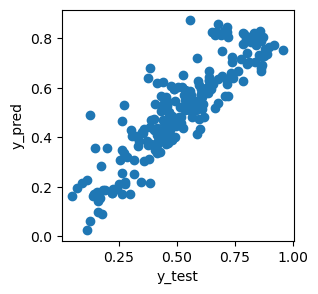

In [69]:
# plotting actual values of target with its predicted values.
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)
plt.show()

### Conclusion

<b>Following are the top 3 features contributing significantly:</b>
<ul>1. <b>temp</b> (Higher <b>Temperature</b> Increases the demand)</ul>
<ul>2. <b>weathersit</b> (When weather has <b>LightSnow</b> it Decreases the demand)</ul>
<ul>3. <b>yr</b> (Higher <b>Year</b> Increases the target, i.e. Year 2019 indicate better demand, as compared to 2018)</ul>

### R <sup>2</sup> score on the test set

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7788741602774808